<a href="https://colab.research.google.com/github/Prajaktahz/ML-Practice-Uni/blob/main/Coursework_1_clinic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.nlab.org.uk/wp-content/uploads/nlabmain.png" style="width:40%; clear:both; margin-bottom:-20px" align=left>
<br style="clear:both;"/>

## Analytics Specializations & Applications - Week 3

# Customer Segmentation - Example Case Study
----------
Dr Georgiana Nica-Avram - University of Nottingham
[mail](mailto:georgiana.nica-avram1@nottingham.ac.uk)

# Coursework 1 - table exploration

In [1]:
# Coursework 1 primer

# This next line is only to be used on Google Colaboratory and will download the CSV file for you

!wget -O asa_cw1_data.zip "https://drive.google.com/uc?export=download&id=1E17e_pf7mu7_cYYh1SaqaOlLPi7jydYR"

!unzip asa_cw1_data.zip

# We can then check that the file is here by listing the content of the current directory
!ls


--2024-03-03 23:33:06--  https://drive.google.com/uc?export=download&id=1E17e_pf7mu7_cYYh1SaqaOlLPi7jydYR
Resolving drive.google.com (drive.google.com)... 142.251.16.102, 142.251.16.139, 142.251.16.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1E17e_pf7mu7_cYYh1SaqaOlLPi7jydYR&export=download [following]
--2024-03-03 23:33:06--  https://drive.usercontent.google.com/download?id=1E17e_pf7mu7_cYYh1SaqaOlLPi7jydYR&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.31.132, 2607:f8b0:4004:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.31.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14111474 (13M) [application/octet-stream]
Saving to: ‘asa_cw1_data.zip’

asa_cw1_data.zip    100%[===================>]  13.46M  36.9MB

In [2]:
import pandas

#-- load in the data
filename1 = "asa_cw1_data/baskets_sample.csv"
filename2 = "asa_cw1_data/category_spends_sample.csv"
filename3 = "asa_cw1_data/customers_sample.csv"
filename4 = "asa_cw1_data/lineitems_sample.csv"

baskets_sample = pandas.read_csv(filename1)
category_spends_sample = pandas.read_csv(filename2).set_index('customer_number')
customers_sample = pandas.read_csv(filename3).set_index('customer_number')
lineitems_sample = pandas.read_csv(filename4)

#-- detail the number of datapoints and featuers
print("Number of datapoints %d and number of features %d in the lineitems_sample table" %(lineitems_sample.shape[0], lineitems_sample.shape[1]))
print("Number of datapoints %d and number of features %d in the customers_sample table" %(customers_sample.shape[0], customers_sample.shape[1]))
print("Number of datapoints %d and number of features %d in the baskets_sample table" %(baskets_sample.shape[0], baskets_sample.shape[1]))
print("Number of datapoints %d and number of features %d in the category_spends_sample table" %(category_spends_sample.shape[0], category_spends_sample.shape[1]))


Number of datapoints 1461315 and number of features 6 in the lineitems_sample table
Number of datapoints 3000 and number of features 5 in the customers_sample table
Number of datapoints 195547 and number of features 5 in the baskets_sample table
Number of datapoints 3000 and number of features 20 in the category_spends_sample table


In [3]:
# Let's have a look at the baskets_sample table
# You'll notice that the basket_spend column is of type object (due to the £ sign), but we need it to be of type float to make any meaningful calculations
print(baskets_sample.dtypes)
baskets_sample.head()

customer_number       int64
purchase_time        object
basket_quantity       int64
basket_spend         object
basket_categories     int64
dtype: object


,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,£3.09,3
1,4047,2007-03-01 07:13:00,9,£7.99,5
2,3571,2007-03-01 07:27:00,9,£37.06,6
3,4079,2007-03-01 07:34:00,11,£11.91,5
4,6063,2007-03-01 07:36:00,3,£1.45,1


## baskets_sample table

In [4]:
# This file details information about each individual visit made by the 3000 customer’s in the sample.
# Please note we don't have a basket_Id uniquely idntifying each visit. Instead, we can use the customer number in conjunction with purchase time as unique identifiers of each visit.

# Replace £ values in the basket_spend column
baskets_sample[baskets_sample.columns[3]]= baskets_sample[baskets_sample.columns[3]].replace('[\£,]', '', regex=True).astype(float)
baskets_sample.head(3)

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,3.09,3
1,4047,2007-03-01 07:13:00,9,7.99,5
2,3571,2007-03-01 07:27:00,9,37.06,6


## category_spends_sample table

In [5]:
# This file again lists the 3000 customers in the sample, but this time it splits down their spend over the period into 20 item categories

print(category_spends_sample.dtypes)
category_spends_sample.head(3)

fruit_veg               object
dairy                   object
confectionary           object
grocery_food            object
grocery_health_pets     object
bakery                  object
newspapers_magazines    object
prepared_meals          object
soft_drinks             object
frozen                  object
meat                    object
tobacco                 object
drinks                  object
deli                    object
world_foods             object
lottery                 object
cashpoint               object
seasonal_gifting        object
discount_bakery         object
practical_items         object
dtype: object


,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items
customer_number,,,,,,,,,,,,,,,,,,,,
11387,£64.58,£35.91,£107.78,£27.08,£29.59,£0.00,£54.83,£6.35,£22.83,£21.51,£28.62,£162.10,£28.02,£28.12,£28.54,£2.00,£15.00,£7.48,£0.00,£0.84
8171,£16.89,£37.24,£28.84,£33.43,£66.40,£0.00,£22.06,£12.09,£2.34,£78.74,£26.44,£0.00,£8.42,£2.65,£3.76,£0.00,£0.00,£9.99,£0.00,£0.00
1060,£87.30,£82.98,£49.88,£20.57,£37.04,£0.00,£9.85,£57.98,£31.12,£14.53,£54.65,£0.00,£0.00,£2.60,£0.00,£18.00,£20.00,£106.46,£0.00,£0.00


In [6]:
# Again, we will need to cast the columns to float
category_spends_sample= category_spends_sample.replace('[\£,]', '', regex=True).astype(float)
category_spends_sample.head(3)

,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items
customer_number,,,,,,,,,,,,,,,,,,,,
11387,64.58,35.91,107.78,27.08,29.59,0.0,54.83,6.35,22.83,21.51,28.62,162.1,28.02,28.12,28.54,2.0,15.0,7.48,0.0,0.84
8171,16.89,37.24,28.84,33.43,66.40,0.0,22.06,12.09,2.34,78.74,26.44,0.0,8.42,2.65,3.76,0.0,0.0,9.99,0.0,0.00
1060,87.30,82.98,49.88,20.57,37.04,0.0,9.85,57.98,31.12,14.53,54.65,0.0,0.00,2.60,0.00,18.0,20.0,106.46,0.0,0.00


## customers_sample table

In [7]:
# A summary file detailing the consumer behaviour of 3000 customers (referenced by an anonymized but consistent “customer_number”)

customers_sample.head(3)

,baskets,total_quantity,average_quantity,total_spend,average_spend
customer_number,,,,,
4749,220,260,1.181818,£631.12,£2.87
4757,248,333,1.342742,£452.42,£1.82
144,226,303,1.340708,£261.16,£1.16


## lineitems_sample table

In [8]:
# A final dataset is also available for use that breaks down each basket into its individual product purchase ids, along with category the item belongs to.
lineitems_sample.head(3)

,customer_number,purchase_time,product_id,category,quantity,spend
0,14577,2007-03-10 11:58:00,722653,GROCERY_FOOD,1,£1.39
1,7210,2007-03-22 10:53:00,696136,GROCERY_HEALTH_PETS,1,£4.25
2,3145,2007-03-26 11:17:00,139543,GROCERY_HEALTH_PETS,1,£0.50


In [9]:
# Engineer new features from existing tables. Save newly-engineered features in new dataframe.

# Create a new dataframe of purchased quantities across product categries
# the unstack() function is the equivalent of a pivot, so we get a column for every unique product category in the table
lineitems_sample_quantity= lineitems_sample.groupby(['customer_number','category'])['quantity'].sum().unstack('category', fill_value=0).add_prefix('QUANTITY_')
lineitems_sample_quantity.reset_index()

lineitems_sample_quantity.head()

category,QUANTITY_BAKERY,QUANTITY_CASHPOINT,QUANTITY_CONFECTIONARY,QUANTITY_DAIRY,QUANTITY_DELI,QUANTITY_DISCOUNT_BAKERY,QUANTITY_DRINKS,QUANTITY_FROZEN,QUANTITY_FRUIT_VEG,QUANTITY_GROCERY_FOOD,QUANTITY_GROCERY_HEALTH_PETS,QUANTITY_LOTTERY,QUANTITY_MEAT,QUANTITY_NEWSPAPERS_MAGAZINES,QUANTITY_PRACTICAL_ITEMS,QUANTITY_PREPARED_MEALS,QUANTITY_SEASONAL_GIFTING,QUANTITY_SOFT_DRINKS,QUANTITY_TOBACCO,QUANTITY_WORLD_FOODS
customer_number,,,,,,,,,,,,,,,,,,,,
14,29,0,28,133,0,1,69,14,18,57,44,0,69,2,0,10,4,17,0,36
45,23,0,126,183,1,0,0,5,27,108,25,0,33,41,0,35,0,38,0,10
52,5,1,10,9,30,0,0,1,54,1,9,1,6,3,0,2,7,18,0,137
61,49,0,81,52,16,0,4,9,59,72,27,1,64,10,3,8,3,19,0,22
63,40,0,71,42,17,0,0,11,21,15,25,3,2,3,0,12,0,3,0,16


In [10]:
lineitems_sample_quantity.describe()

category,QUANTITY_BAKERY,QUANTITY_CASHPOINT,QUANTITY_CONFECTIONARY,QUANTITY_DAIRY,QUANTITY_DELI,QUANTITY_DISCOUNT_BAKERY,QUANTITY_DRINKS,QUANTITY_FROZEN,QUANTITY_FRUIT_VEG,QUANTITY_GROCERY_FOOD,QUANTITY_GROCERY_HEALTH_PETS,QUANTITY_LOTTERY,QUANTITY_MEAT,QUANTITY_NEWSPAPERS_MAGAZINES,QUANTITY_PRACTICAL_ITEMS,QUANTITY_PREPARED_MEALS,QUANTITY_SEASONAL_GIFTING,QUANTITY_SOFT_DRINKS,QUANTITY_TOBACCO,QUANTITY_WORLD_FOODS
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,44.575000,3.952667,71.946333,74.768000,10.599333,1.724333,16.055667,23.027333,71.985000,67.259000,50.277333,5.903667,23.926667,25.648000,1.034333,26.036333,2.703000,27.328667,21.325667,13.645667
std,42.121694,9.486926,74.627876,60.313614,20.627457,8.860202,33.813967,26.271734,69.106116,65.774326,64.607299,21.958911,27.997963,44.758178,2.394939,28.261551,4.302902,38.384751,44.603103,25.599829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,24.750000,33.000000,0.000000,0.000000,0.000000,6.000000,24.000000,22.750000,14.000000,0.000000,6.000000,2.000000,0.000000,7.000000,0.000000,5.000000,0.000000,1.000000
50%,34.000000,0.000000,50.000000,60.000000,2.000000,0.000000,3.000000,15.000000,54.000000,48.000000,31.000000,0.000000,15.000000,10.000000,0.000000,17.000000,1.000000,15.000000,1.000000,6.000000
75%,58.250000,3.000000,94.000000,99.000000,12.000000,0.000000,16.000000,31.000000,98.000000,90.000000,63.000000,3.000000,33.000000,28.000000,1.000000,35.000000,4.000000,34.000000,21.250000,17.000000
max,594.000000,118.000000,1069.000000,696.000000,267.000000,138.000000,390.000000,229.000000,1133.000000,1077.000000,998.000000,397.000000,323.000000,521.000000,70.000000,267.000000,56.000000,515.000000,650.000000,462.000000


In [11]:
# Inner-join dataframes using Python syntax.
# An inner-join selects all rows from both participating tables as long as there is a matching column between them (index) - in this case 'customer_number' is common in both
# Also note that spend across product categories and quantities across product categories are aggregated at customer level, so both category_spends_sample and lineitems_sample_quantity have 3,000 records

# Join the newly created lineitems_sample_quantity showing purchased quantities across product categories, with the category_spends_sample table (which shows £ spend across product categories)
category_spend_quantity= category_spends_sample.merge(lineitems_sample_quantity, how= 'inner', left_index=True, right_index=True)
# The resulting table now has 3,000 rows (records) and 40 columns (features)

In [12]:
# Further merge the resulting category_spend_quantity table with information on baskets,	total_quantity,	average_quantity,	total_spend,	average_spend for each customer from the customer_sample table
# Again, note that both tables (category_spend_quantity and customer_sample) can be joined on a common column (customer_number)
category_spend_quantity_customers= category_spend_quantity.merge(customers_sample, how= 'inner', left_index=True, right_index=True)

# The resulting tables now has 3,000 rows (records) and 45 columns (features)
print("Number of datapoints: %d and number of features: %d in the category_spend_quantity_customers table" %(category_spend_quantity_customers.shape[0], category_spend_quantity_customers.shape[1]))


Number of datapoints: 3000 and number of features: 45 in the category_spend_quantity_customers table


In [13]:
# Finally, can we join the baskets_sample table with the category_spend_quantity_customers?
# Yes, but you will not get the desired outcome. You'll have noticed that the baskets_sample table has 195,547 records (rows), while the category_spend_quantity_customers has 3,000 records.
# While it is possible to join the two tables based on the customer_number, the resulting table would duplicate rows from the category_spend_quantity_customers in order to match every one of the 195,547 rows in the baskets_sample table
# So we need to start by aggregating the 3 numeric columns in the baskets_sample table at customer level (like we did with lineitems_sample)

baskets_sample_sum= baskets_sample.groupby('customer_number')['basket_quantity','basket_spend',	'basket_categories'].sum().add_prefix('SUM_')
print("Number of datapoints %d and number of features %d in the baskets_sample_sum table" %(baskets_sample_sum.shape[0], baskets_sample_sum.shape[1]))
baskets_sample_sum.head()

# Now we can join the category_spend_quantity
customers_baskets_categories_lines= baskets_sample_sum.merge(category_spend_quantity_customers, how= 'inner', left_index=True, right_index=True)
print("Number of datapoints %d and number of features %d in the customers_baskets_categories_lines table" %(customers_baskets_categories_lines.shape[0], customers_baskets_categories_lines.shape[1]))
customers_baskets_categories_lines.head(3)

Number of datapoints 3000 and number of features 3 in the baskets_sample_sum table
Number of datapoints 3000 and number of features 48 in the customers_baskets_categories_lines table


<ipython-input-13-80f0a55d7784>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  baskets_sample_sum= baskets_sample.groupby('customer_number')['basket_quantity','basket_spend',	'basket_categories'].sum().add_prefix('SUM_')


,SUM_basket_quantity,SUM_basket_spend,SUM_basket_categories,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,...,QUANTITY_PREPARED_MEALS,QUANTITY_SEASONAL_GIFTING,QUANTITY_SOFT_DRINKS,QUANTITY_TOBACCO,QUANTITY_WORLD_FOODS,baskets,total_quantity,average_quantity,total_spend,average_spend
customer_number,,,,,,,,,,,,,,,,,,,,,
14,531,675.72,250,11.10,172.58,23.22,56.05,11.28,0.0,6.40,...,10,4,17,0,36,381,531,1.393701,£675.72,£1.77
45,655,585.73,211,30.21,142.16,106.54,83.42,24.31,0.0,17.49,...,35,0,38,0,10,561,655,1.167558,£585.73,£1.04
52,294,222.18,174,53.29,5.19,3.29,1.08,12.11,0.0,3.12,...,2,7,18,0,137,206,294,1.427184,£222.18,£1.08


In [14]:
# Let's list all the columns in the big table we just generated:
list(customers_baskets_categories_lines.columns.values)

['SUM_basket_quantity',
 'SUM_basket_spend',
 'SUM_basket_categories',
 'fruit_veg',
 'dairy',
 'confectionary',
 'grocery_food',
 'grocery_health_pets',
 'bakery',
 'newspapers_magazines',
 'prepared_meals',
 'soft_drinks',
 'frozen',
 'meat',
 'tobacco',
 'drinks',
 'deli',
 'world_foods',
 'lottery',
 'cashpoint',
 'seasonal_gifting',
 'discount_bakery',
 'practical_items',
 'QUANTITY_BAKERY',
 'QUANTITY_CASHPOINT',
 'QUANTITY_CONFECTIONARY',
 'QUANTITY_DAIRY',
 'QUANTITY_DELI',
 'QUANTITY_DISCOUNT_BAKERY',
 'QUANTITY_DRINKS',
 'QUANTITY_FROZEN',
 'QUANTITY_FRUIT_VEG',
 'QUANTITY_GROCERY_FOOD',
 'QUANTITY_GROCERY_HEALTH_PETS',
 'QUANTITY_LOTTERY',
 'QUANTITY_MEAT',
 'QUANTITY_NEWSPAPERS_MAGAZINES',
 'QUANTITY_PRACTICAL_ITEMS',
 'QUANTITY_PREPARED_MEALS',
 'QUANTITY_SEASONAL_GIFTING',
 'QUANTITY_SOFT_DRINKS',
 'QUANTITY_TOBACCO',
 'QUANTITY_WORLD_FOODS',
 'baskets',
 'total_quantity',
 'average_quantity',
 'total_spend',
 'average_spend']

In [15]:
customers_baskets_categories_lines.shape

(3000, 48)

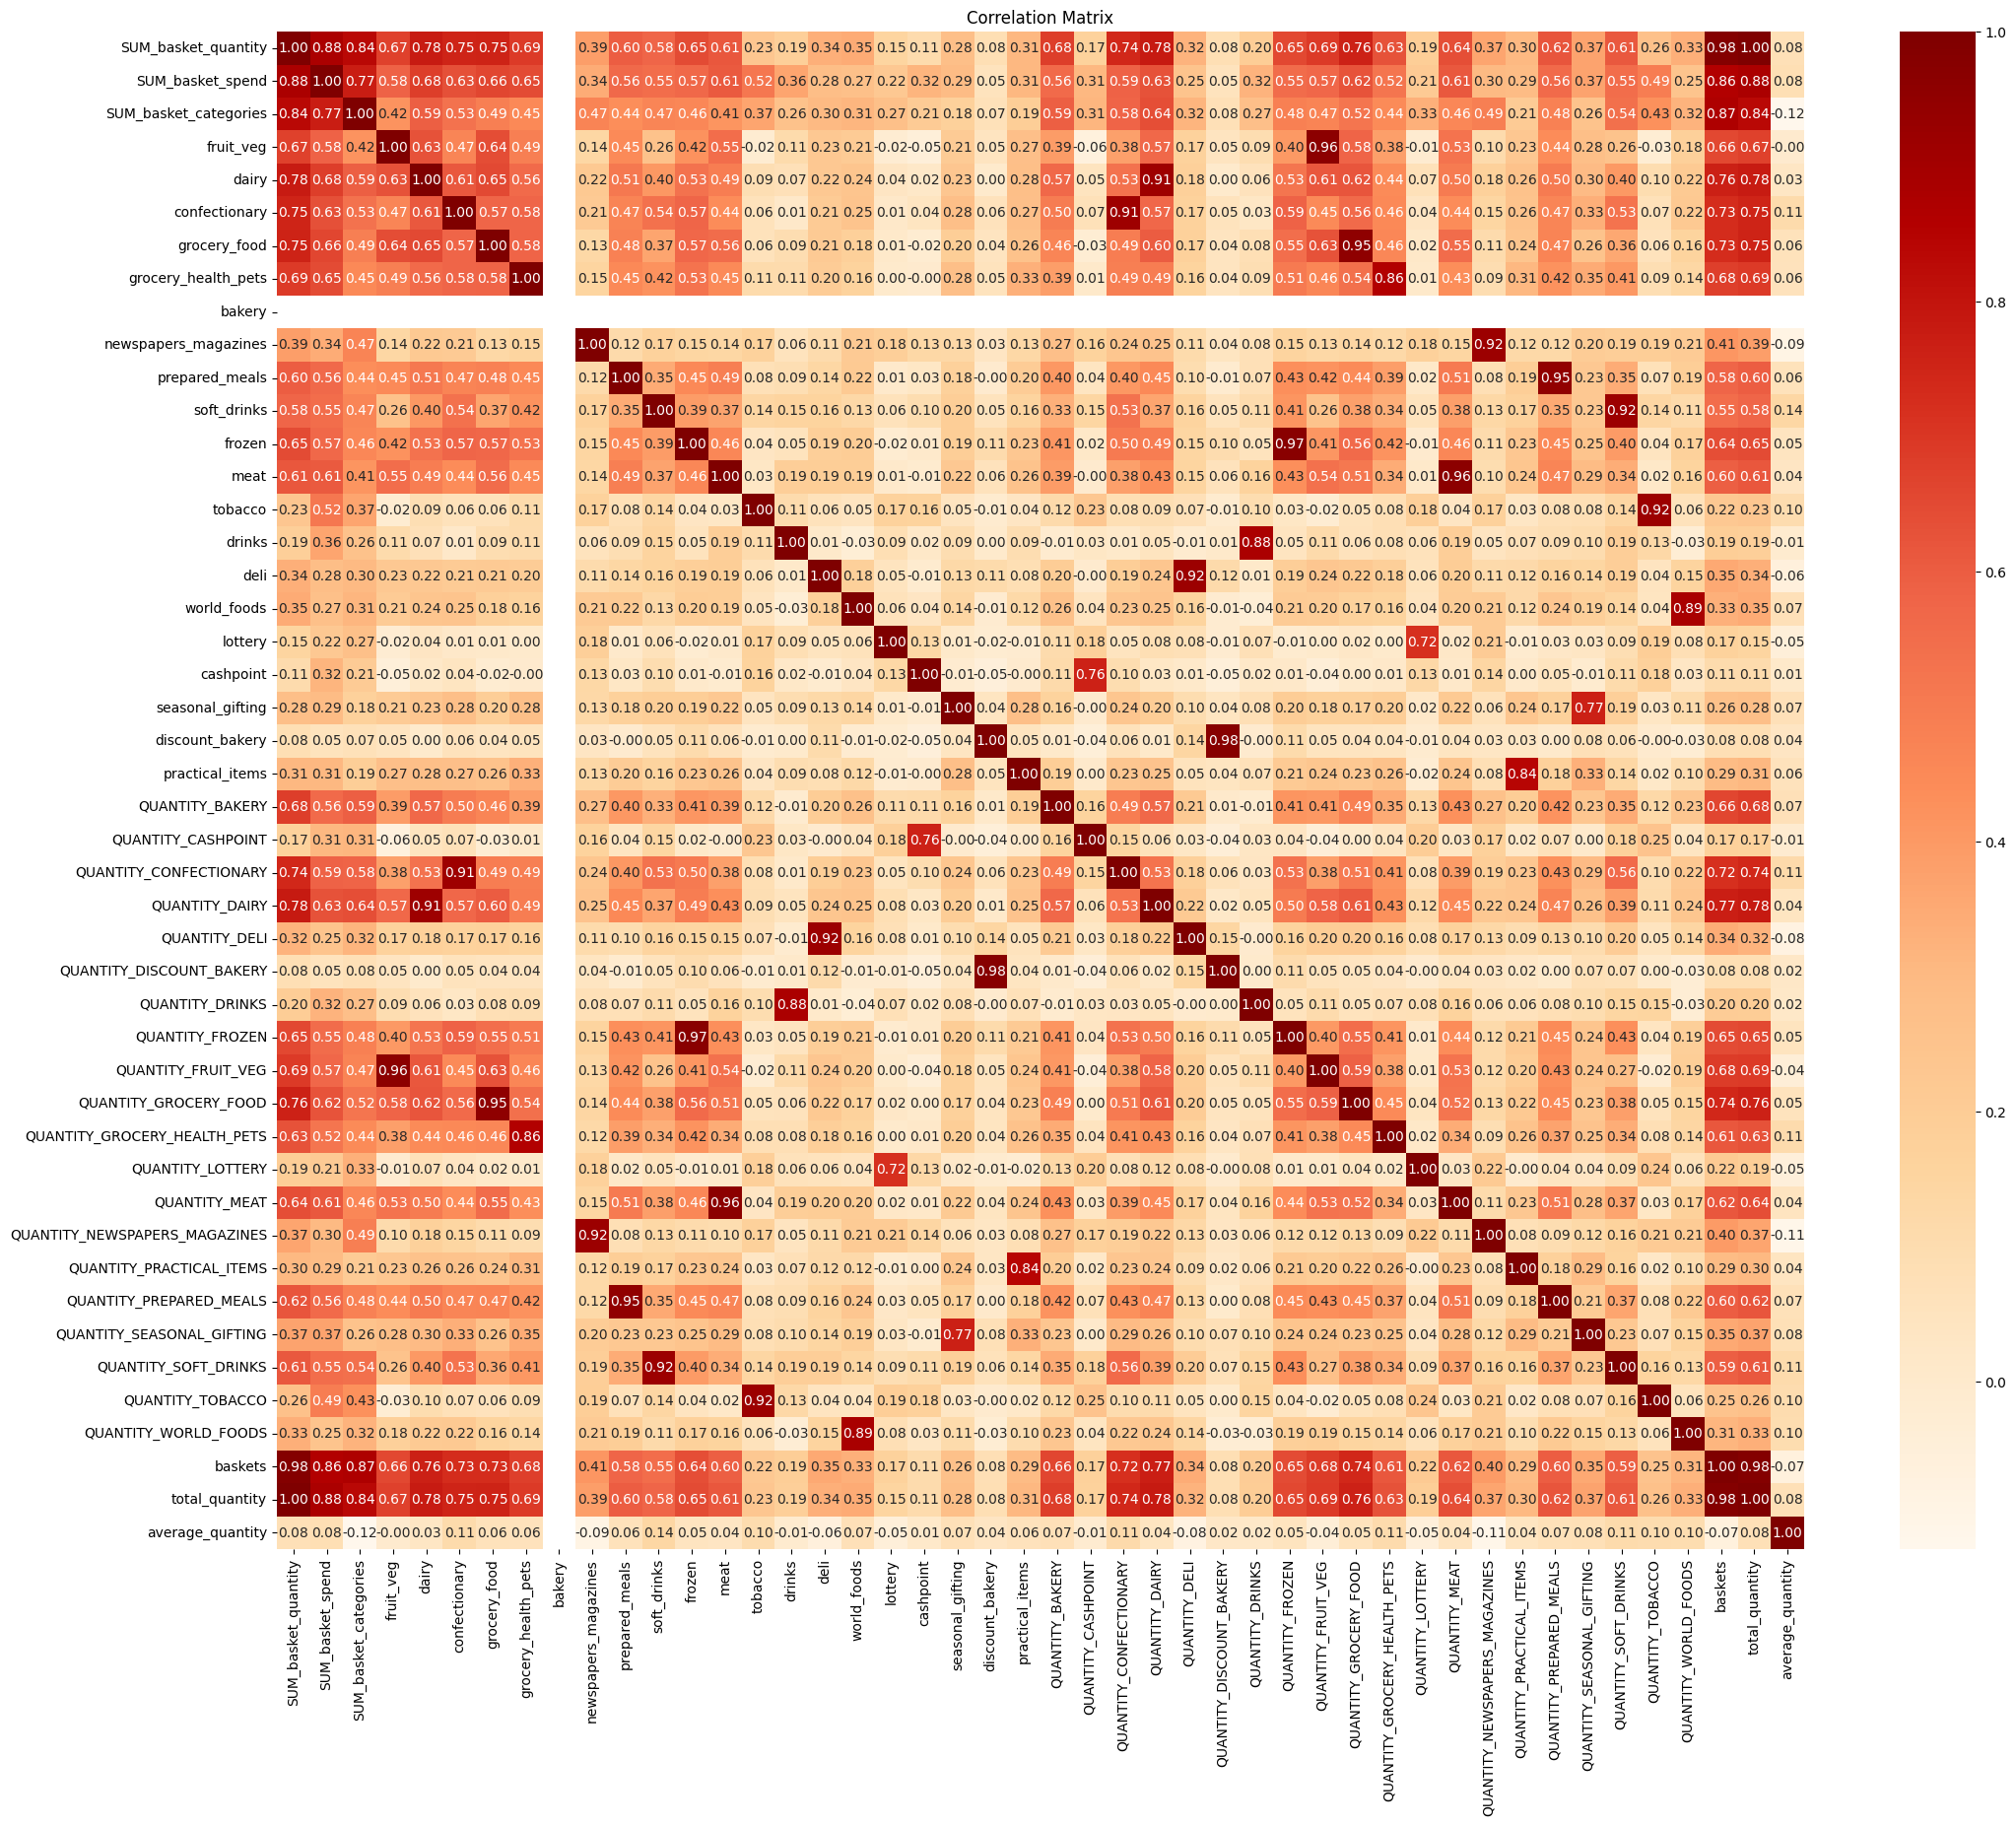

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr = customers_baskets_categories_lines.corr(numeric_only = True)


plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, cmap='OrRd', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Most likely, for your analysis you will not need all 48 columns, so one easy way of slicing this dataframe is using the .loc function
selected_df= customers_baskets_categories_lines.loc[:, ['SUM_basket_quantity', 'fruit_veg', 'QUANTITY_BAKERY','baskets']]
selected_df.head(3)

# Using SQL queries in Google Colab

In [ ]:
# If you are more confident about quering tables using SQL, this is how you can start in Google Colab
# The following commands will create SQLite .db database, connection and cursor. my_data.db database will store our tables

from pathlib import Path
Path('my_data.db').touch()
import sqlite3
con = sqlite3.connect('my_data.db')
cur = con.cursor()
sqlite3.sqlite_version

In [ ]:
# Dataframes can be uploaded into SQLite format using the defined connection con.

lineitems_sample.to_sql('lineitems_sample', con,  index=False)

#-- Do the same for the remaining dataframes loaded for your coursework

In [ ]:
# Install the following libraries

!pip3 install sqlalchemy # -- install library if you haven't already
!pip3 install sqlalchemy_schemadisplay
from sqlalchemy import MetaData
from sqlalchemy_schemadisplay import create_schema_graph
from sqlalchemy import  create_engine
import pandas

engine = create_engine('sqlite:///my_data.db') # using relative path
meta = MetaData(bind=engine)
engine.connect()
print(engine)

In [ ]:
# Run SQL syntax in the Python environment

x= pandas.read_sql_query("""SELECT * FROM lineitems_sample WHERE customer_number= 14 AND category like 'BAKERY'""", con)
print(x)